# **1. Dataset Selection**

**1.1 Dataset**

Name: CO2 Emission by Vehicles

Link: https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles/data

**1.2 Dataset content**

# Vehicle Information Guide

## Model
- **4WD/4X4**: Four-wheel drive  
- **AWD**: All-wheel drive  
- **FFV**: Flexible-fuel vehicle  
- **SWB**: Short wheelbase  
- **LWB**: Long wheelbase  
- **EWB**: Extended wheelbase  

## Transmission
- **A**: Automatic  
- **AM**: Automated manual  
- **AS**: Automatic with select shift  
- **AV**: Continuously variable  
- **M**: Manual  
- **3 - 10**: Number of gears  

## Fuel Type
- **X**: Regular gasoline  
- **Z**: Premium gasoline  
- **D**: Diesel  
- **E**: Ethanol (E85)  
- **N**: Natural gas  

## Fuel Consumption
City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km).  
The combined rating (55% city, 45% highway) is shown in L/100 km and in miles per gallon (mpg).  

## CO2 Emissions
The tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving.


# **2. Data Analysis**

**2.1 Imports**

In [273]:
#data processing
import pandas as pd
import numpy as np

#data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Machine learning library
import sklearn

import warnings
warnings.filterwarnings("ignore")

**2.2 Basic understanding of the dataset**

In [274]:
dtf = pd.read_csv("./data/CO2 Emissions_Canada.csv")

In [275]:
dtf.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [276]:
dtf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [277]:
dtf.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [278]:
dtf.shape

(7385, 12)

In [279]:
dtf.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

**2.3 Let examine the distribution of the target feature**


<Axes: >

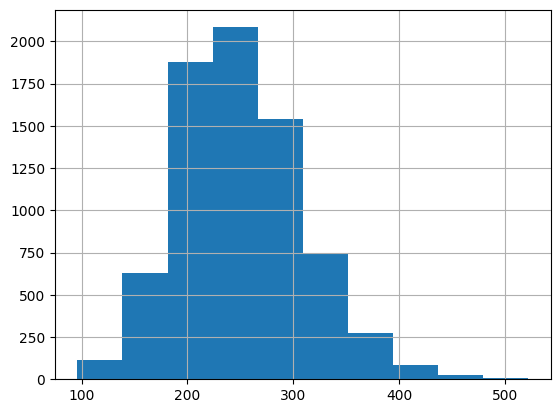

In [280]:
dtf['CO2 Emissions(g/km)'].hist()

<Axes: xlabel='CO2 Emissions(g/km)', ylabel='Density'>

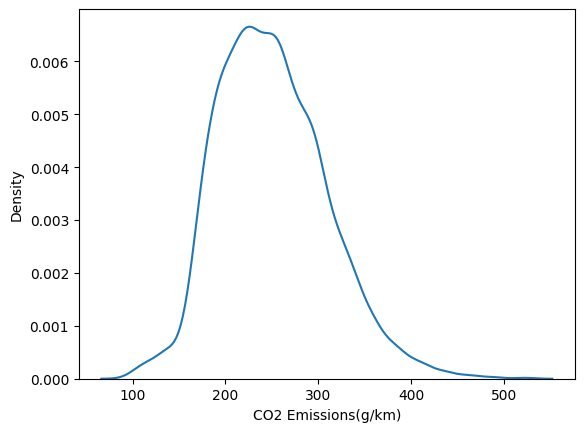

In [281]:
sns.kdeplot(dtf['CO2 Emissions(g/km)'])

**2.4**

**5 visualizations that are relevant for
understanding the nature of the data, mainly focused on the target attribute and it’s relationship with other attributes**

*VISUALIZATION 1:*

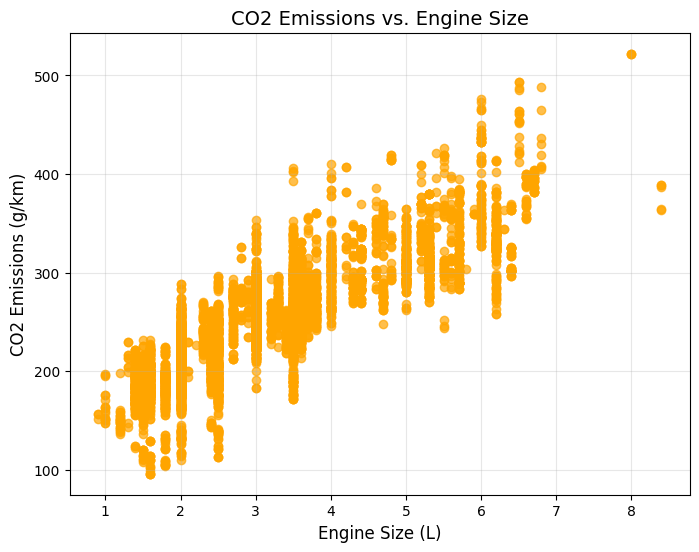

In [282]:
plt.figure(figsize=(8, 6))
plt.scatter(dtf['Engine Size(L)'], dtf['CO2 Emissions(g/km)'], alpha=0.7, color='orange')
plt.title('CO2 Emissions vs. Engine Size', fontsize=14)
plt.xlabel('Engine Size (L)', fontsize=12)
plt.ylabel('CO2 Emissions (g/km)', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

***1.Why this visualization was chosen:***

> This scatter plot was chosen to explore the relationship between Engine Size (L) and CO2 Emissions (g/km).


***2.Why it’s significant for the task at hand:***

> By identifying a clear relationship between engine size and CO2 emissions, this visualization helps confirm whether engine size is an essential variable in predicting emissions.

***3.What We See From the Result of the Visualization:***

> We can see from the plot that the relation between the CO2 emission and the engine size seems to be linear.

> Larger engines produce more CO2.

> Smaller engines produce less CO2.


*VISUALIZATION 2:*

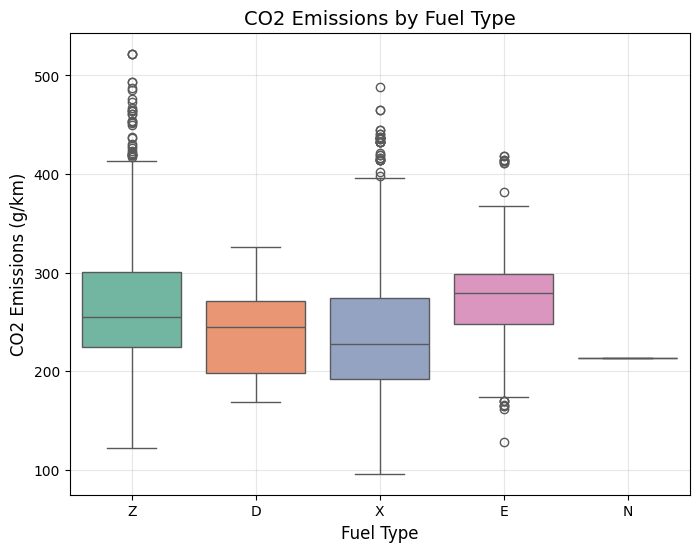

In [283]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=dtf, x='Fuel Type', y='CO2 Emissions(g/km)', palette='Set2')
plt.title('CO2 Emissions by Fuel Type', fontsize=14)
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('CO2 Emissions (g/km)', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

***1.Why this visualization was chosen:***

> This box plot was chosen to illustrate the distribution of CO2 Emissions (g/km) across different Fuel Types.


***2.Why it’s significant for the task at hand:***

> It allows for easy comparison of CO2 emissions between different fuel types, highlighting which types are more environmentally friendly.

> Box plots display outliers, indicating specific vehicles that significantly deviate from the expected emissions range which can help identify areas for further investigation.

***3.What We See From the Result of the Visualization:***

> The median emissions vary significantly among fuel types, with type E showing higher emissions compared to types Z and D, indicating that fuel type affects emissions.

> There are several outliers across all fuel types, particularly in X and E, indicating that certain models may be less efficient or have specific factors leading to high emissions.

*VISUALIZATION 3:*

<Axes: >

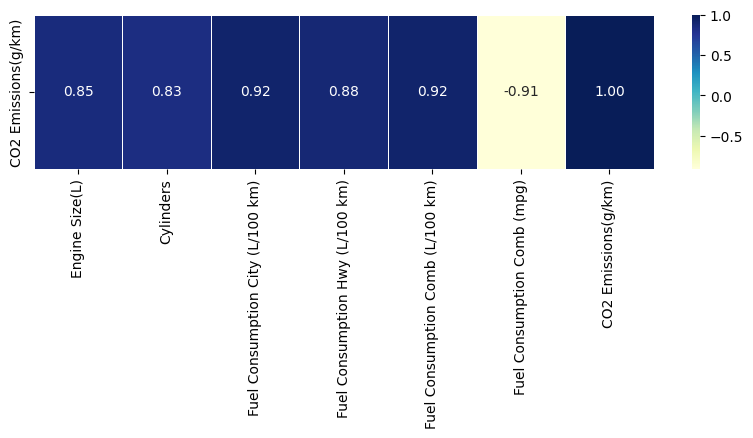

In [284]:
# Select only numeric columns
numeric_dtf = dtf.select_dtypes(include=['float64', 'int64'])

dtf_corr = numeric_dtf.corr(method="pearson").loc[["CO2 Emissions(g/km)"]]

fig, ax = plt.subplots(figsize=(10,2))

sns.heatmap(dtf_corr, annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5,ax=ax)

***1.Why this visualization was chosen:***

> This heatmap was chosen to represent the correlation between various numerical features in the dataset and CO2 Emissions (g/km).


***2.Why it’s significant for the task at hand:***

> By visualizing the correlation coefficients, we can understand which features are most closely related to CO2 emissions. This is essential for feature selection and model building.

> Strong correlations can guide the development of new features or inform decisions on which existing features to include in the model, potentially improving predictive performance.

***3.What We See From the Result of the Visualization:***

> Features such as Engine Size (L), Fuel Consumption City (L/100 km), Fuel Consumption Hwy (L/100 km), and Fuel Consumption Comb (L/100 km) show strong positive correlations with CO2 emissions, indicating that larger engine sizes and higher fuel consumption lead to increased emissions.

> There is a significant negative correlation between Fuel Consumption Comb (mpg) and CO2 emissions, suggesting that higher fuel efficiency (measured in miles per gallon) corresponds to lower emissions.


*VISUALIZATION 4:*

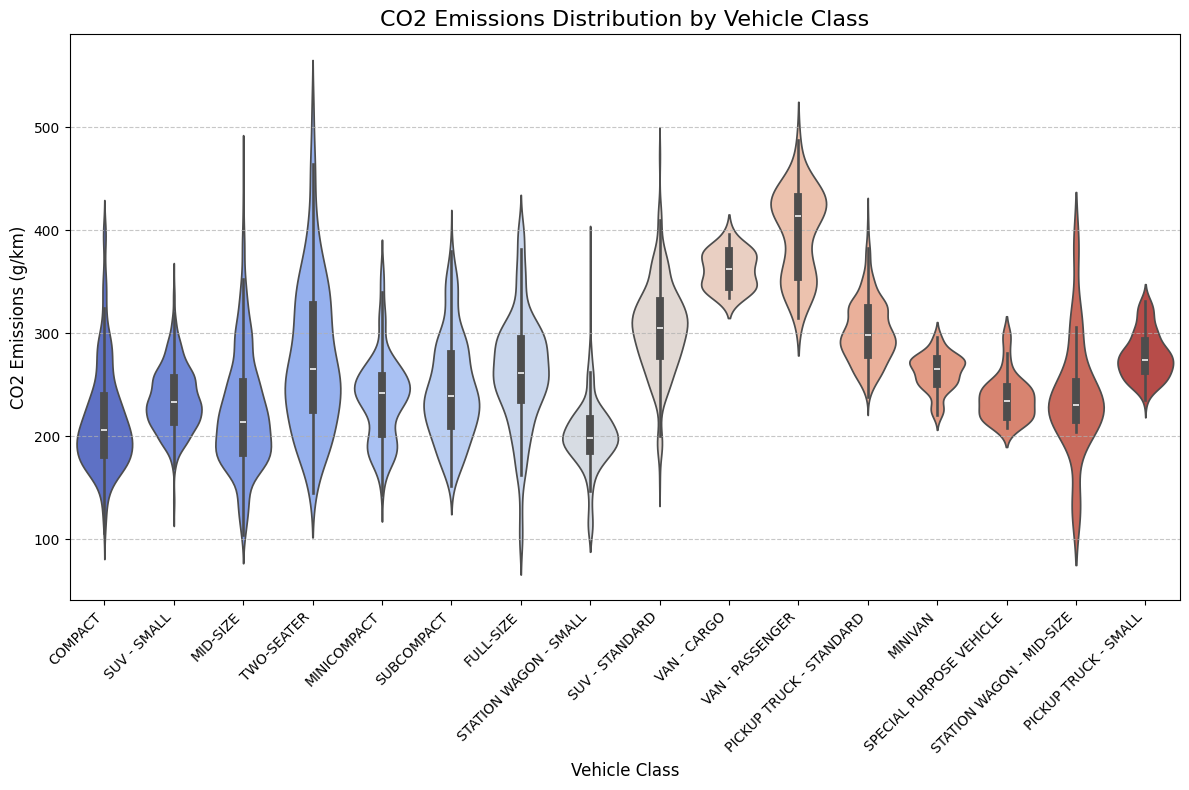

In [285]:
plt.figure(figsize=(12, 8))
sns.violinplot(
    x='Vehicle Class',
    y='CO2 Emissions(g/km)',
    data=dtf,
    palette='coolwarm',
    scale='width'
)

plt.title("CO2 Emissions Distribution by Vehicle Class", fontsize=16)
plt.xlabel("Vehicle Class", fontsize=12)
plt.ylabel("CO2 Emissions (g/km)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

***1.Why this visualization was chosen:***

> The violin plot was chosen to visualize the distribution of CO2 emissions (g/km) for different vehicle classes. allowing us to observe both the central tendency and the spread or density of the data for each category.

***2.Why it’s significant for the task at hand:***

> This visualization is significant because it directly correlates the vehicle class to CO2 emissions, which is critical for understanding the relationship between vehicle types and their environmental impact. It is particularly useful for identifying which vehicle classes tend to produce higher CO2 emissions, and whether the emissions vary significantly within each class.

***3.What We See From the Result of the Visualization:***

> Vehicle classes like "Pickup Truck - Standard" and "Special Purpose Vehicle" generally produce higher CO2 emissions.

> Classes such as "Compact," "Subcompact," and "Mini Compact" tend to have lower CO2 emissions, suggesting smaller vehicles are more environmentally friendly.

> Larger vehicles (e.g., "SUV - Standard" and "Pickup Truck - Small") have broader distributions, indicating more variability in emissions within those classes.

> A few vehicle classes show extreme CO2 emissions (e.g., above 500 g/km).

*VISUALIZATION 5:*

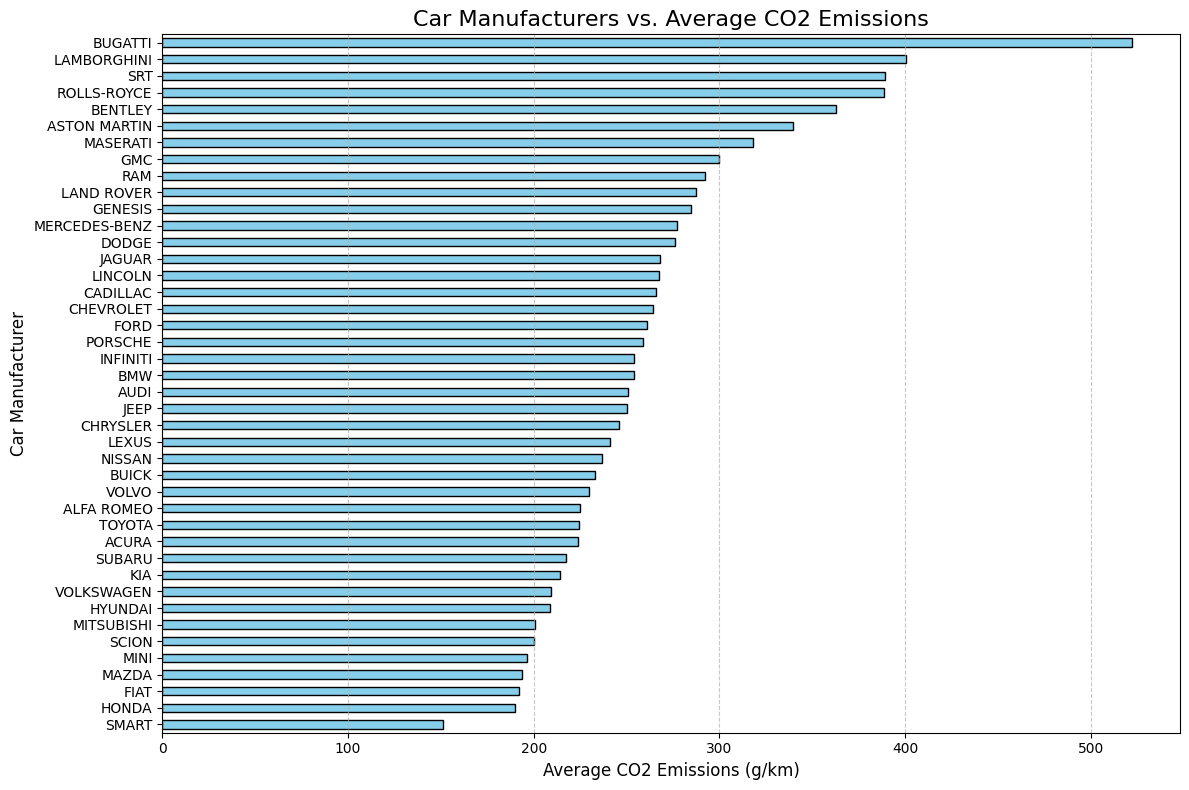

In [286]:
avg_emissions_by_make = dtf.groupby('Make')['CO2 Emissions(g/km)'].mean().sort_values()

plt.figure(figsize=(12, 8))
avg_emissions_by_make.plot(kind='barh', color='skyblue', edgecolor='black')

plt.title(f"Car Manufacturers vs. Average CO2 Emissions", fontsize=16)
plt.xlabel("Average CO2 Emissions (g/km)", fontsize=12)
plt.ylabel("Car Manufacturer", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

***1.Why this visualization was chosen:***

> The horizontal bar plot was chosen to show the average CO2 emissions (g/km) for different car manufacturers.

***2.Why it’s significant for the task at hand:***

> This visualization is significant because it allows us to identify manufacturers with the highest and lowest average CO2 emissions.
And to understand which brands contribute more significantly to environmental pollution.


***3.What We See From the Result of the Visualization:***

> Brands like Bugatti, Lamborghini, and SRT have the highest average CO2 emissions, which aligns with their production of high-performance, luxury, or sports cars with large engines.

> Manufacturers like Smart, Honda, and Fiat have the lowest average CO2 emissions, indicating a focus on smaller, more fuel-efficient, or hybrid vehicles.

> Luxury and sports car brands generally produce higher emissions, while economy, and compact car manufacturers tend to have lower emissions.

# **3. Basic Model Pipeline**

**3.1 Split dataset to train and test**

In [287]:
from sklearn.model_selection import train_test_split

In [288]:
# Add noise to the target feature, because otherwise the model is too good
dtf['CO2 Emissions(g/km)'] += np.random.normal(loc=0, scale=30, size=len(dtf))

X = dtf.drop(columns=['CO2 Emissions(g/km)'])
y = dtf['CO2 Emissions(g/km)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**3.2 Check for null values**

In [289]:
X_train.isna().sum()
y_train.isna().sum()

0

**3.3 Check the categorical features**

In [290]:
categorical_cols = X_train.select_dtypes(include=['object']).columns

for col in categorical_cols:
    X_train[col].value_counts()
    print(X_train[col].value_counts())
    print()

Make
FORD             499
CHEVROLET        478
BMW              423
MERCEDES-BENZ    349
PORSCHE          301
GMC              273
TOYOTA           259
AUDI             230
JEEP             206
DODGE            196
NISSAN           195
KIA              185
HONDA            174
HYUNDAI          169
MINI             164
VOLKSWAGEN       145
MAZDA            141
LEXUS            139
JAGUAR           129
CADILLAC         123
SUBARU           109
VOLVO             96
INFINITI          85
LINCOLN           81
RAM               78
CHRYSLER          73
BUICK             73
MITSUBISHI        72
LAND ROVER        65
FIAT              58
ACURA             58
MASERATI          47
ROLLS-ROYCE       46
BENTLEY           37
LAMBORGHINI       37
ASTON MARTIN      35
ALFA ROMEO        29
GENESIS           22
SCION             18
SMART              6
BUGATTI            3
SRT                2
Name: count, dtype: int64

Model
F-150 FFV 4X4               27
F-150 FFV                   25
MUSTANG           

**3.4 Cleaning categorical features**

Removing the brand feature because it's introduce too much features

In [291]:
X_train.drop(columns=['Make'], inplace=True)
X_test.drop(columns=['Make'], inplace=True)
X.drop(columns=['Make'], inplace=True)

Reducing the number of categories to the transmission feature

In [292]:
transmission_mapping = {
    'A': 'Automatic',
    'AM': 'Automated Manual',
    'AS': 'Automatic with shift',
    'AV': 'Continuously variable',
    'M': 'Manual',
}

def map_transmission(transmission):
    numeric_part = ''.join(filter(str.isdigit, transmission))
    letter_part = ''.join(filter(str.isalpha, transmission))
    if letter_part in transmission_mapping:
        return f"{transmission_mapping[letter_part]}"
    else:
        return transmission

# Apply the mapping to the transmission column
X_train['Transmission'] = X_train['Transmission'].apply(map_transmission)
X_test['Transmission'] = X_test['Transmission'].apply(map_transmission)

<Axes: xlabel='Transmission'>

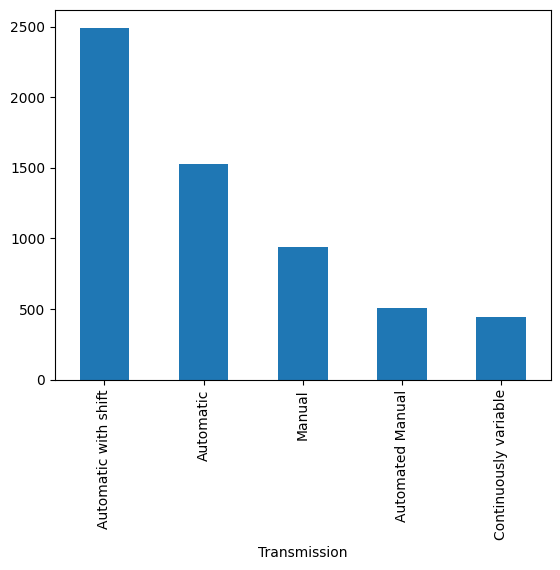

In [293]:
vc = X_train['Transmission'].value_counts()
vc.plot(kind='bar')

**3.5 Preprocess categorical features**

In [294]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [295]:
# Split categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Define preprocessing pipelines
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

**3.6 Defining the model pipeline**

In [296]:
from xgboost import XGBRegressor
import xgboost as xgb

In [297]:
model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)

# Pipelines
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Train
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Model', 'Vehicle Class', 'Transmission'...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

# **4. Evaluation**

**4.1 Evaluation metrics**

In [298]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [299]:
y_pred = pipeline.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Model Evaluation Metrics:
Mean Absolute Error (MAE): 24.01
Mean Squared Error (MSE): 900.49
Root Mean Squared Error (RMSE): 30.01
R² Score: 0.77


In [300]:
# Residuals
residuals = y_test - y_pred

# Max error
max_error = residuals.abs().max()
tolerance = 1e-6
matching_indices = residuals[abs(residuals.abs() - max_error) < tolerance].index
print("Max Error:", "{:,.0f}".format(max_error))

Max Error: 131


**4.2 Visualizations of the predictions**

<Axes: xlabel='CO2 Emissions(g/km)', ylabel='CO2 Emissions(g/km)'>

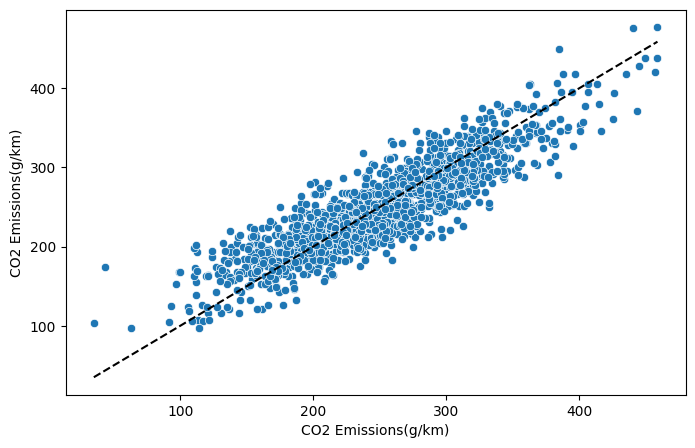

In [301]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred, ax=ax)
sns.lineplot(x=y_test, y=y_test, ax=ax, color='black', linestyle='--')

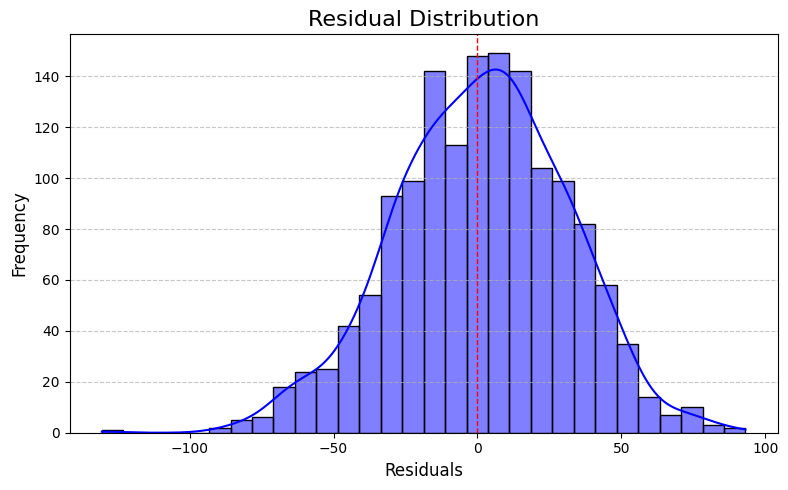

In [302]:
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.title("Residual Distribution", fontsize=16)
plt.xlabel("Residuals", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.axvline(0, color='red', linestyle='--', linewidth=1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

> The residuals appear centered around zero, suggesting that the model is not biased toward overestimating or underestimating.


> Residuals extend from around -100 to +100, showing not significant deviations.

**4.3 Model performances**

In [303]:
error_df = pd.DataFrame({
    "True Values": y_test,
    "Predicted Values": y_pred,
    "Residuals": residuals
})

# Top 5 worst predictions (highest residuals)
worst_predictions = error_df.nlargest(5, "Residuals")
print("Worst Predictions:\n", worst_predictions)

print()

# Top 5 best predictions (lowest residuals)
best_predictions = error_df.nsmallest(5, "Residuals")
print("Best Predictions:\n", best_predictions)

Worst Predictions:
       True Values  Predicted Values  Residuals
6388   383.753504        290.657837  93.095667
7025   312.428663        226.495895  85.932768
1831   297.148100        212.311188  84.836913
6311   332.059137        249.518723  82.540414
5151   302.954155        220.842560  82.111595

Best Predictions:
       True Values  Predicted Values   Residuals
3211    43.303029        173.826584 -130.523555
5421   111.576347        201.658722  -90.082375
6643   110.404921        198.283203  -87.878283
4583   137.673165        219.398224  -81.725059
1068   197.855598        278.888641  -81.033043


**Worst Predictions**

*Observations:*

> The True Values for the worst predictions are all very high, but the Predicted Values are significantly lower.
The Residuals range from approximately 75 to 100, indicating a consistent underestimation for these cases.

*Potential Reasons:*

> The model struggles with predicting very high CO2 emissions, suggesting it may lack sufficient training data in this range.


> Features related to high-emission vehicles (specific manufacturers, vehicle types, or engine sizes) might not be adequately represented in the dataset or the model might not be capturing their influence effectively.


**Best Predictions**

*Observations*:

> The True Values for the best predictions are relatively low, but the Predicted Values are much higher.
The Residuals range from approximately -85 to -100, indicating a consistent overestimation for these cases.

*Potential Reasons:*
> The model might struggle to distinguish between vehicles with very low CO2 emissions, potentially due to limited variance in feature representation.

> The model may overfit certain features that correlate strongly with low emissions, leading to exaggerated predictions for these instances.

In [304]:
underestimations = residuals[residuals > 0].count()
overestimations = residuals[residuals < 0].count()

print(f"Underestimations: {underestimations}")
print(f"Overestimations: {overestimations}")

Underestimations: 774
Overestimations: 703


***Underestimations:***

> The model underestimates slightly more frequently, potentially due to limited representation of high-emission vehicles or regularization biasing predictions closer to the mean.

***Overestimations:***

> Less frequent but still significant, suggesting the model sometimes overcompensates for low-emission features.

**4.4 Model explainability**

In [305]:
# transform hot one vectors to initial features

X_test_transformed = pipeline.named_steps['preprocessor'].transform(X_test)

if hasattr(X_test_transformed, 'toarray'):
    X_test_dense = X_test_transformed.toarray()
else:
    X_test_dense = X_test_transformed

feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

X_test_df = pd.DataFrame(X_test_dense, columns=feature_names)

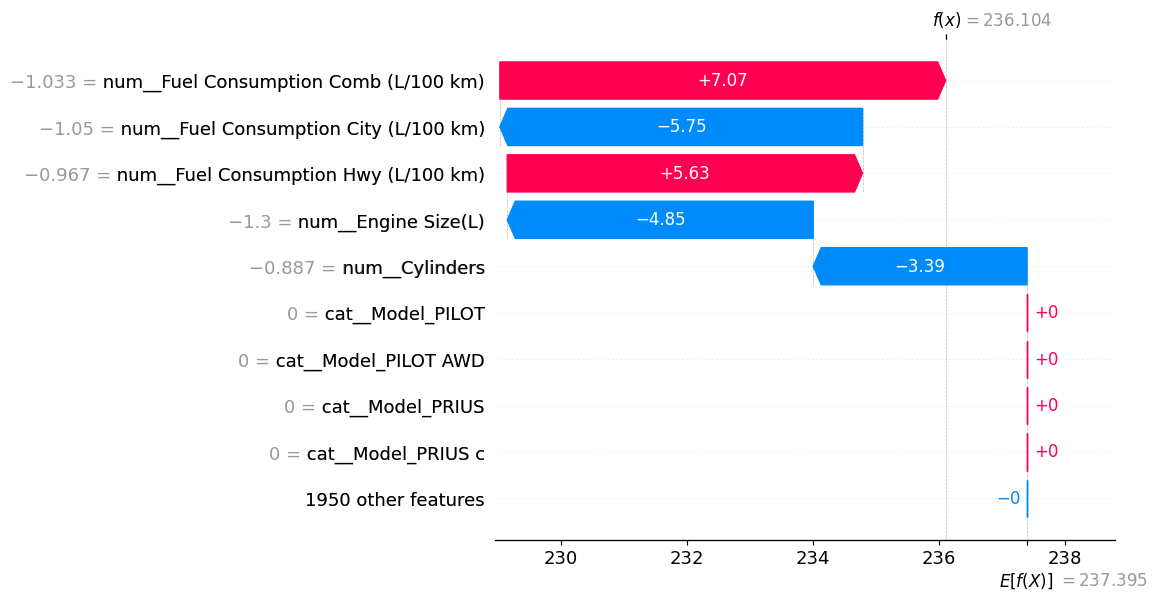

In [306]:
import shap
explainer = shap.Explainer(pipeline.named_steps['model'], X_test_df)
shap_values = explainer(X_test_df)

shap.plots.waterfall(shap_values[0])

> The top three features (Fuel Consumption (L/100 km), Engine Size, and num_Fuel Consumption Hwy (L/100 km)) have significant negative contributions to the prediction, indicating that as their values increase, the predicted outcome decreases.

> The final predicted value is influenced heavily by these features, showcasing the importance of fuel consumption metrics in this context.

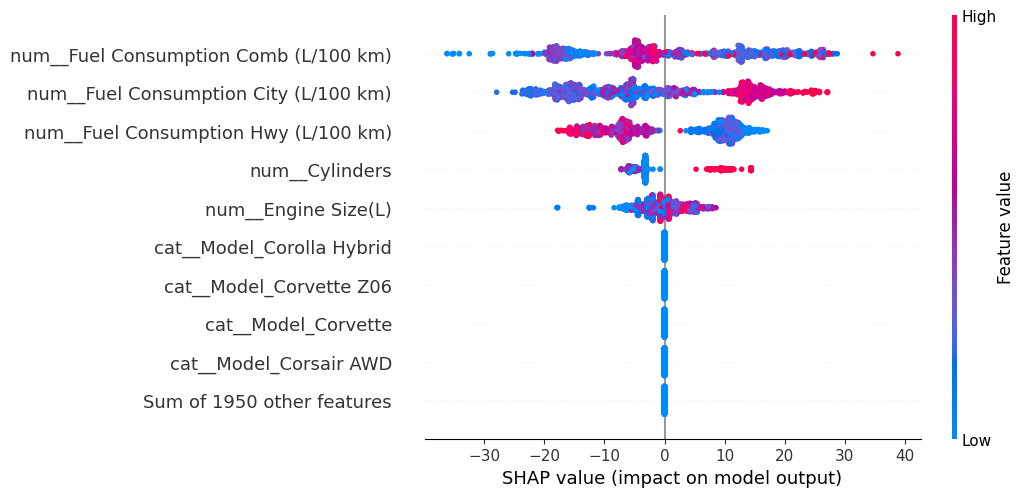

In [307]:
shap.plots.beeswarm(shap_values)

> The beeswarm plot highlights that features like Fuel consumption are frequently important across multiple predictions, with their values often leading to negative contributions.

> The spread of points for each feature indicates variability in their impact; for instance, higher fuel consumption generally leads to lower predicted outcomes, while lower values result in more positive predictions.

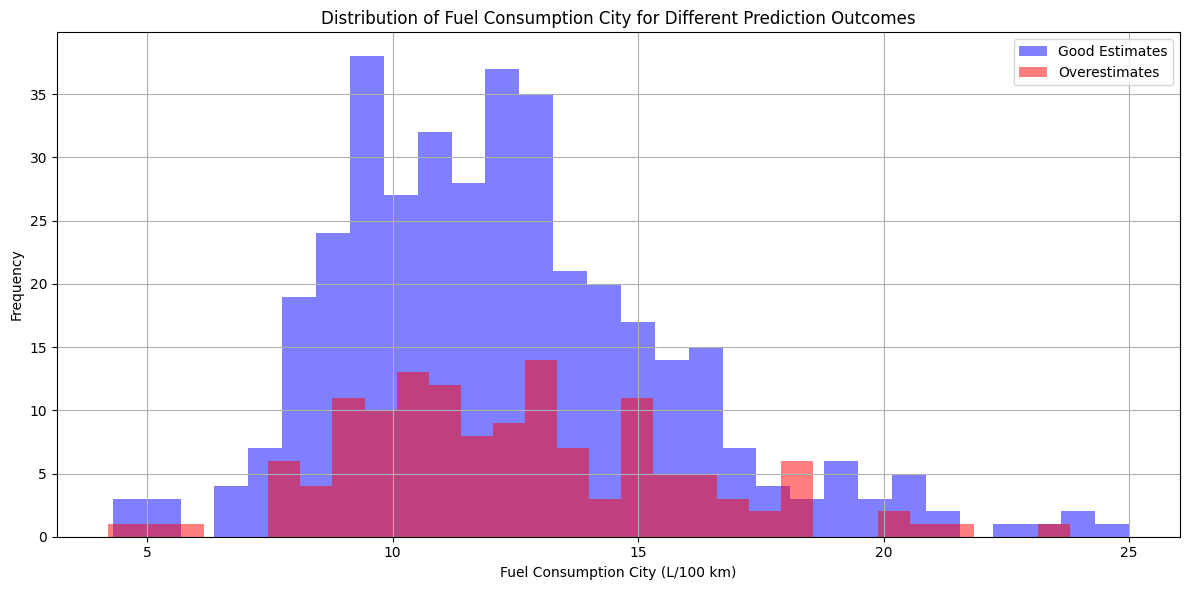

In [308]:
absolute_residuals = residuals.abs()

over_estimates = X_test.loc[absolute_residuals[absolute_residuals > 50].index]
good_estimates = X_test.loc[absolute_residuals[absolute_residuals < 10].index]

fig, ax = plt.subplots(figsize=(12, 6))

good_estimates['Fuel Consumption City (L/100 km)'].hist(ax=ax, color='blue', alpha=0.5, bins=30, label='Good Estimates')

over_estimates['Fuel Consumption City (L/100 km)'].hist(ax=ax, color='red', alpha=0.5, bins=30, label='Overestimates')

ax.set_xlabel('Fuel Consumption City (L/100 km)')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Fuel Consumption City for Different Prediction Outcomes')
ax.legend()

plt.tight_layout()
plt.show()

> The model is effective for a majority of cases (indicated by the higher frequency of good estimates), while overestimates are relatively rare, showing that the model might sometimes underestimate the fuel consumption for certain vehicle configurations. This indicates areas where the model can potentially be improved, such as understanding the features leading to overestimations and refining the model based on those insights